<a href="https://colab.research.google.com/github/warwavn/AI-SUT2025/blob/main/Day%209%20Deep%20Learning%20Introduction/ex3_polynomial_reg_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.11.0

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.11.0 (from versions: 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.11.0


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv(r'/content/drive/MyDrive/AI_SUT_2025_Workspace/ex3_bike_sharing_daily - ex3_bike_sharing_daily.csv')

Data Reference:

This Hadi Fanaee-T
Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto INESC Porto, Campus da FEUP Rua Dr. Roberto Frias, 378 4200 - 465 Porto, Portugal

Data Description:

instant: record index\
dteday : date\
season : season (1:springer, 2:summer, 3:fall, 4:winter)\
yr : year (0: 2011, 1:2012)\
mnth : month ( 1 to 12)\
hr : hour (0 to 23)\
holiday : wether day is holiday or not\
weekday : day of the week\
workingday : if day is neither weekend nor holiday is 1, otherwise is 0.\
weathersit :\
1: Clear, Few clouds, Partly cloudy\
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist\
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds\
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp : **Normalized** temperature in Celsius. The values are divided to 41 (max)\
hum: **Normalized** humidity. The values are divided to 100 (max)\
windspeed: **Normalized** wind speed. The values are divided to 67 (max)\
casual: count of casual users\
registered: count of registered users\
cnt: count of total rental bikes including both casual and registeredtemp, hum,windspeed are normalized

In [38]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796


In [50]:
df.drop(columns = ['instant','dteday','casual','registered'],axis=1,inplace =True)

<Axes: >

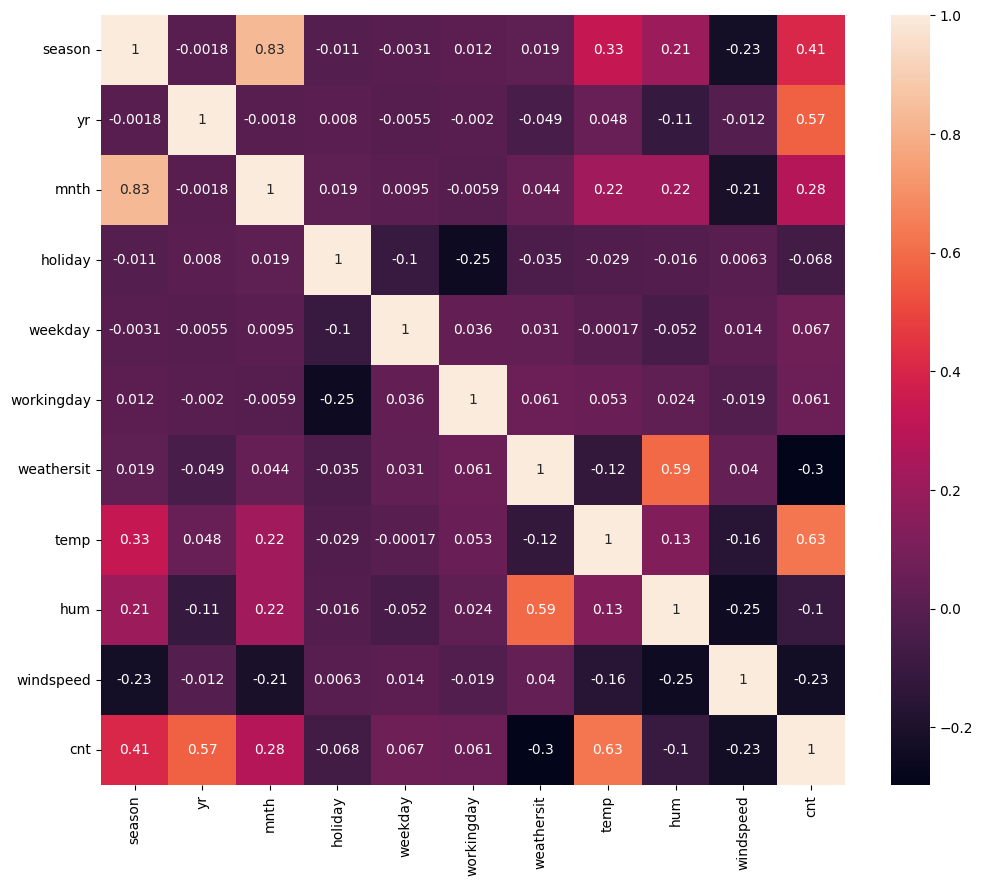

In [66]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[df.select_dtypes(include=['int64','float64']).columns.tolist()].corr(), annot=True)

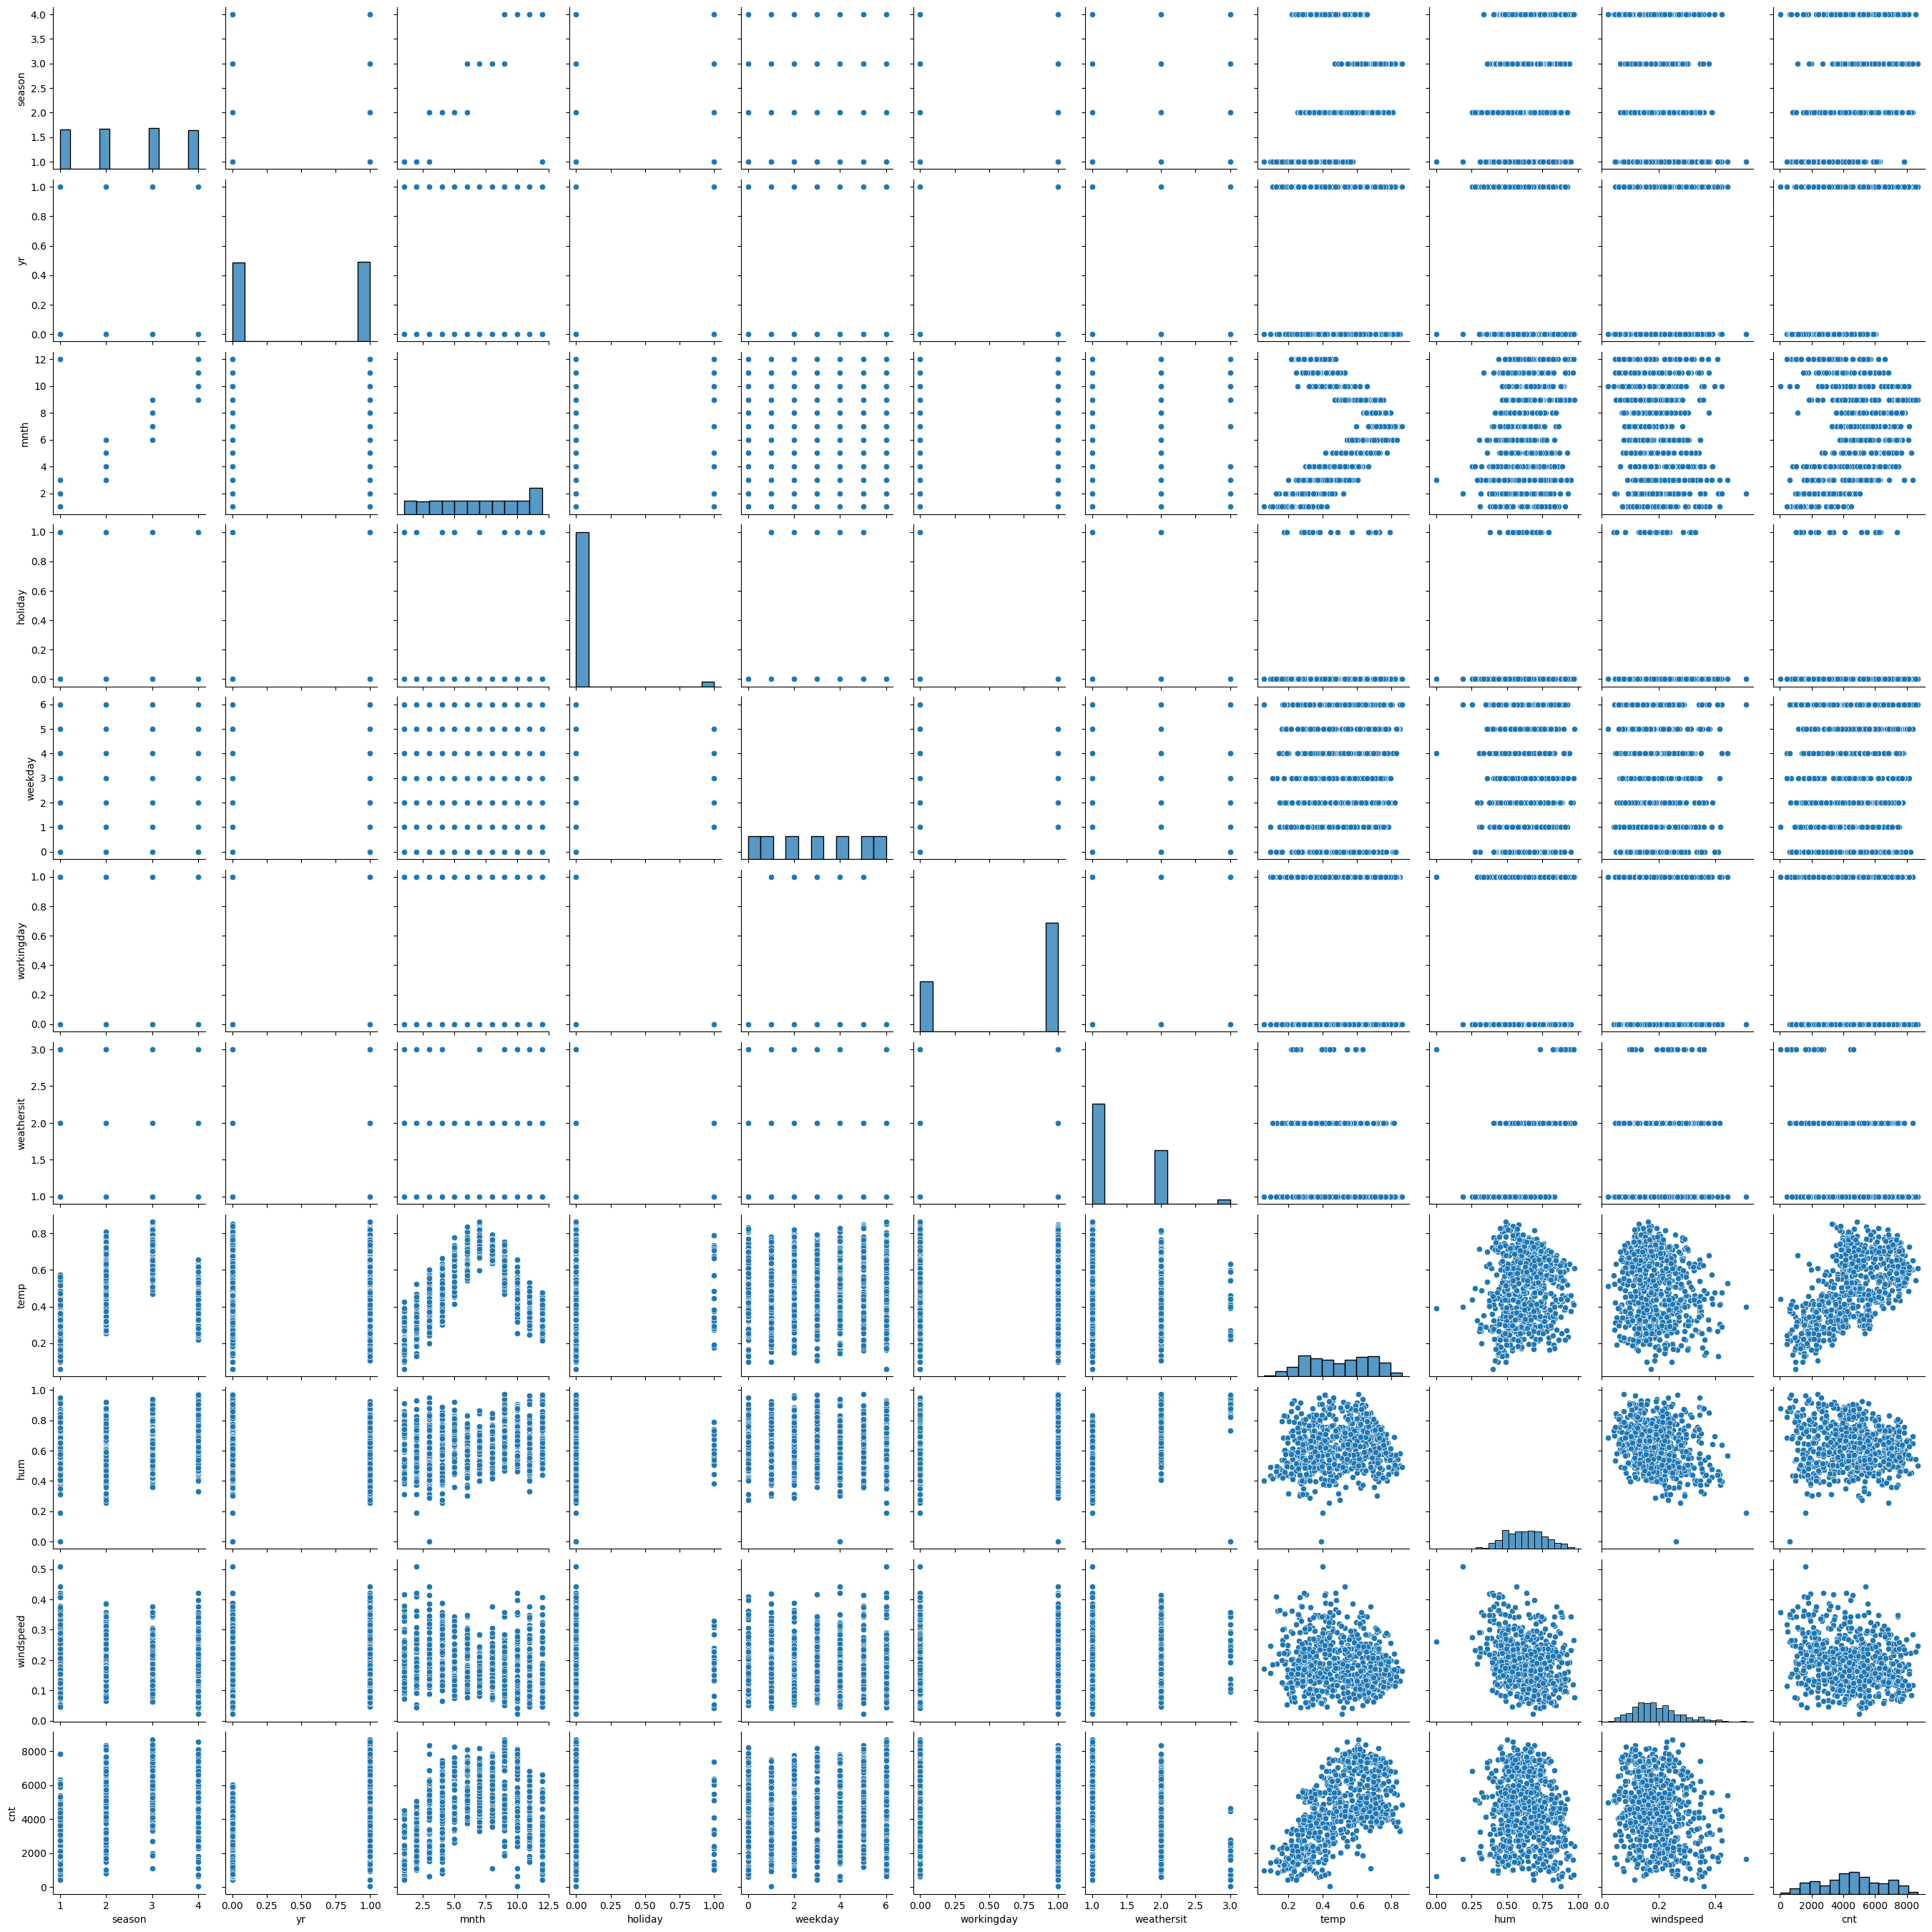

In [52]:
sns.pairplot(df)

Encoder

In [42]:
df.columns.tolist()

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'hum',
 'windspeed',
 'cnt']

In [54]:
x_cat = df[['season','yr','mnth','holiday','weekday','workingday','weathersit']]

In [55]:
x_num = df.drop(columns=x_cat.columns.tolist(),axis=1)

In [148]:
x_num

,temp,hum,windspeed,cnt
0,0.344167,0.805833,0.160446,985
1,0.363478,0.696087,0.248539,801
2,0.196364,0.437273,0.248309,1349
3,0.200000,0.590435,0.160296,1562
4,0.226957,0.436957,0.186900,1600
...,...,...,...,...
726,0.254167,0.652917,0.350133,2114
727,0.253333,0.590000,0.155471,3095
728,0.253333,0.752917,0.124383,1341
729,0.255833,0.483333,0.350754,1796


In [53]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder

In [57]:
encoder = OneHotEncoder()
x_cat_new = encoder.fit_transform(x_cat).toarray()
x_cat_new


array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [67]:
x_cat_new.shape

(731, 32)

In [68]:
x_num.shape

(731, 4)

In [69]:
x_cat = pd.DataFrame(x_cat_new)

In [106]:
x_all = pd.concat([x_cat,x_num],axis=1)

In [73]:
x_all

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.254167,0.652917,0.350133,2114
727,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.253333,0.590000,0.155471,3095
728,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.253333,0.752917,0.124383,1341
729,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.255833,0.483333,0.350754,1796


In [107]:
x = x_all.drop('cnt',axis=1).values                  #x_all.iloc[: , :-1].values
y = x_all.iloc[: , -1:].values                       #x_all['cnt'].values => need to reshape

In [169]:
x_all['cnt'].values

array([ 985,  801, 1349, 1562, 1600, 1606, 1510,  959,  822, 1321, 1263,
       1162, 1406, 1421, 1248, 1204, 1000,  683, 1650, 1927, 1543,  981,
        986, 1416, 1985,  506,  431, 1167, 1098, 1096, 1501, 1360, 1526,
       1550, 1708, 1005, 1623, 1712, 1530, 1605, 1538, 1746, 1472, 1589,
       1913, 1815, 2115, 2475, 2927, 1635, 1812, 1107, 1450, 1917, 1807,
       1461, 1969, 2402, 1446, 1851, 2134, 1685, 1944, 2077,  605, 1872,
       2133, 1891,  623, 1977, 2132, 2417, 2046, 2056, 2192, 2744, 3239,
       3117, 2471, 2077, 2703, 2121, 1865, 2210, 2496, 1693, 2028, 2425,
       1536, 1685, 2227, 2252, 3249, 3115, 1795, 2808, 3141, 1471, 2455,
       2895, 3348, 2034, 2162, 3267, 3126,  795, 3744, 3429, 3204, 3944,
       4189, 1683, 4036, 4191, 4073, 4400, 3872, 4058, 4595, 5312, 3351,
       4401, 4451, 2633, 4433, 4608, 4714, 4333, 4362, 4803, 4182, 4864,
       4105, 3409, 4553, 3958, 4123, 3855, 4575, 4917, 5805, 4660, 4274,
       4492, 4978, 4677, 4679, 4758, 4788, 4098, 39

**Important**\
normalize target

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

y = scaler.fit_transform(y)

In [109]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2)

In [110]:
x_test.shape

(147, 35)

In [165]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50,activation='relu',input_shape=[35]))         #hidden layer 1
model.add(tf.keras.layers.Dense(50,activation='relu'))                          #hidden layer 2
model.add(tf.keras.layers.Dense(50,activation='relu'))                          #hidden layer 3
model.add(tf.keras.layers.Dense(1))                                             #output; if no activation it will be linear

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                     │ (None, 50)                  │           1,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,951 (27.15 KB)

 Trainable params: 6,951 (27.15 KB)

 Non-trainable params: 0 (0.00 B)

In [166]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.005),loss='mean_squared_error')

hist = model.fit(x_train,y_train, epochs = 100, batch_size = 10, validation_split=0.2)
#batch_size = data point qty, adj follow compute resorce. small batch size provide better model perf (<32)
#val for hyperparameter tuning, val loss should follow loss otherwise overfitting

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0511 - val_loss: 0.0134
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - val_loss: 0.0124
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - val_loss: 0.0112
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - val_loss: 0.0133
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - val_loss: 0.0115
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0056 - val_loss: 0.0139
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - val_loss: 0.0146
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - val_loss: 0.0120
Epoch 9/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - val_loss: 0.0138
Epoch 10/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - val_loss: 0.0126
Epoch 11/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - val_loss: 0.0126
Epoch 12/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0

In [115]:
# histt = model.fit(x,y, epochs = 200)

Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0616 
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0562 
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0534 
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0594 
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0511 
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0504 
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0526
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0539 
Epoch 9/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0580 
Epoch 10/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0518 
Epoch 11/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0558 
Epoch 12/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0582 
Epoch 13/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0601 
Epoch 14/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0545
Epoch 15/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss:

In [116]:
hist.history.keys()

dict_keys(['loss', 'val_loss'])

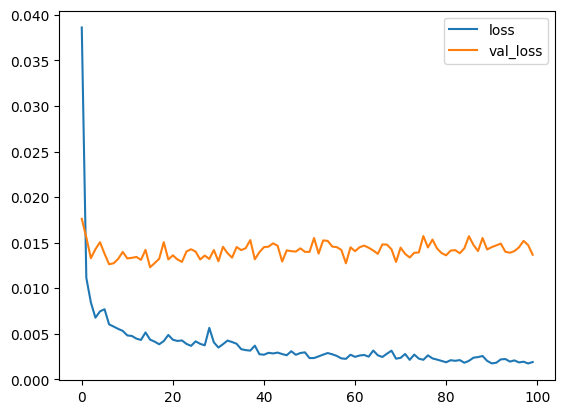

In [162]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()

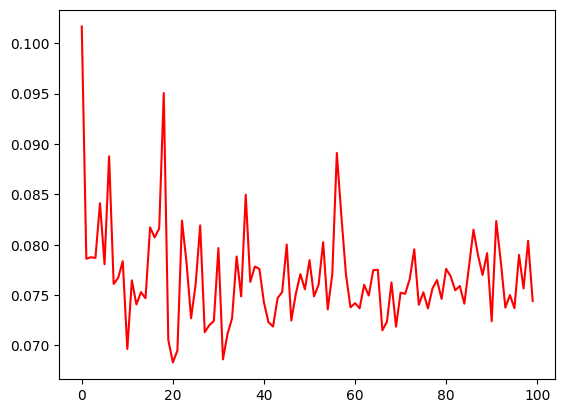

In [153]:
plt.plot(hist.history['val_loss'],label='val_loss',c='r')

In [132]:
x_test

array([[1.      , 0.      , 0.      , ..., 0.2825  , 0.31125 , 0.24005 ],
       [0.      , 0.      , 1.      , ..., 0.728333, 0.497917, 0.261821],
       [0.      , 1.      , 0.      , ..., 0.57    , 0.682917, 0.283587],
       ...,
       [1.      , 0.      , 0.      , ..., 0.196522, 0.651739, 0.145365],
       [1.      , 0.      , 0.      , ..., 0.317391, 0.655652, 0.184309],
       [0.      , 1.      , 0.      , ..., 0.348696, 0.469565, 0.295274]])

In [134]:
x_train

array([[1.      , 0.      , 0.      , ..., 0.5725  , 0.507083, 0.115062],
       [0.      , 0.      , 0.      , ..., 0.374167, 0.685   , 0.082725],
       [0.      , 0.      , 1.      , ..., 0.8275  , 0.457917, 0.194029],
       ...,
       [1.      , 0.      , 0.      , ..., 0.195   , 0.6875  , 0.113837],
       [0.      , 0.      , 0.      , ..., 0.589167, 0.896667, 0.141787],
       [0.      , 1.      , 0.      , ..., 0.775833, 0.622083, 0.136817]])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


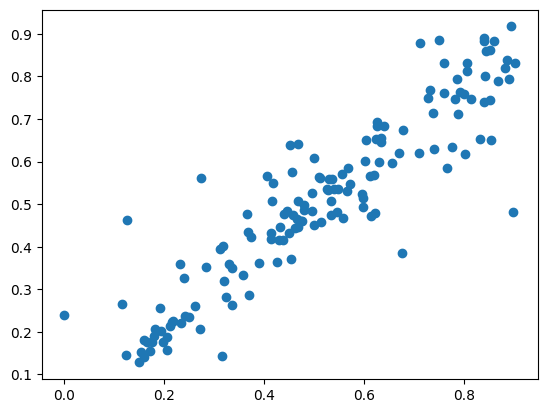

In [167]:
y_test_pred = model.predict(x_test)

plt.scatter(y_test,y_test_pred)

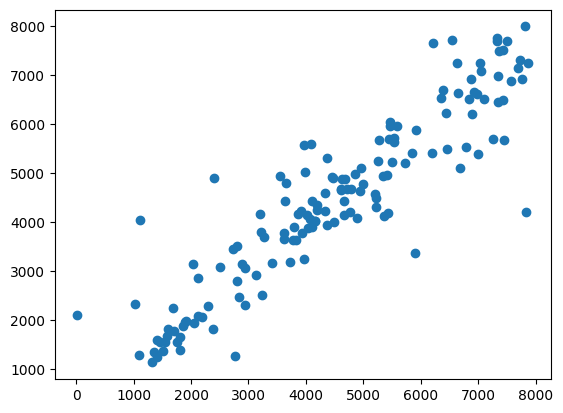

In [168]:
y_test_pred_unscaled = scaler.inverse_transform(y_test_pred)
y_test_unscaled = scaler.inverse_transform(y_test)

plt.scatter(y_test_unscaled,y_test_pred_unscaled)